<a href="https://colab.research.google.com/github/nadametwaly/Obesity-Prediction/blob/main/G3_Week2_Obesity_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Review These
Overview on Decision Trees: https://www.datacamp.com/community/tutorials/decision-tree-classification-python

More on Encoding: https://pbpython.com/categorical-encoding.html

In [1]:
from sklearn import tree
#import pandas
import pandas as pd
#import numpy
import numpy as np


In [2]:
# Run this cell to download the dataset
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/00544/ObesityDataSet_raw_and_data_sinthetic%20(2).zip"
!unzip "/content/ObesityDataSet_raw_and_data_sinthetic (2).zip" 

--2022-11-16 19:28:03--  https://archive.ics.uci.edu/ml/machine-learning-databases/00544/ObesityDataSet_raw_and_data_sinthetic%20(2).zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 119205 (116K) [application/x-httpd-php]
Saving to: ‘ObesityDataSet_raw_and_data_sinthetic (2).zip’

ObesityDataSet_raw_ 100%[===================>] 116.41K  --.-KB/s    in 0.1s    

2022-11-16 19:28:04 (804 KB/s) - ‘ObesityDataSet_raw_and_data_sinthetic (2).zip’ saved [119205/119205]

Archive:  /content/ObesityDataSet_raw_and_data_sinthetic (2).zip
  inflating: ObesityDataSet_raw_and_data_sinthetic.arff  
  inflating: ObesityDataSet_raw_and_data_sinthetic.csv  


In [3]:
#import dataset as a pandas dataframe - name it df - using the .read_csv method
dataset = 'ObesityDataSet_raw_and_data_sinthetic.csv'
df = pd.read_csv(dataset)

In [4]:
#view first 5 rows of the dataset using the .head() method
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [7]:
#check for the total amount of null values in each column using the .isnull() method
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Number of Columns

In [8]:
df.shape[1]

17

Are there any new features that could be derived from our old features?


In [11]:
#create a function that takes your df as an input then calculates the BMI using the equation: BMI= Weight/ Height**2
def func(df):
  BMI=df['Weight']/(df['Height']**2)
  return BMI


In [12]:
# apply the function to every row in the dataframe, create a new column, 'BMI' that contains those values. HINT: You can use .apply and lambda
df['BMI'] = func(df)

In [13]:
#check your dataframe
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


Drop old features, i.e: height and weight

In [19]:
#use .drop() method to your dataframe, don't forget to set inplace=True
df.drop(['Weight','Height'],inplace=True,axis=1)

In [20]:
#check your dataframe
df.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Female,21.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.0,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


In [ ]:
#check your columns' data types using the .dtypes method

Check the unique values in your target label

In [21]:
df['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

Create two Dataframes of Features X and Output Y

In [23]:
X =  df.drop(['NObeyesdad'],axis=1)

In [40]:
y = df[['NObeyesdad']]


Change column name to something that makes sense

In [41]:
#replace newcolumname
y.rename(columns= {'NObeyesdad': 'obesity '}, inplace= True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Encode your Catgorical Features

In [42]:
X_encoded = pd.get_dummies(X)

In [43]:
X_encoded.columns

Index(['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI', 'Gender_Female',
       'Gender_Male', 'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes',
       'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CALC_Always',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile',
       'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
       'MTRANS_Walking'],
      dtype='object')

*Perform* label encoding to y

In [44]:
# run this cell to check your label column - y
y.columns

Index(['obesity '], dtype='object')

In [47]:
# import preprocessing module from sklearn
from sklearn import preprocessing
#initialize label encoder
le = preprocessing.LabelEncoder()
y['obesity ']=le.fit_transform(y['obesity '])

# fit the data to your initialized label encoder


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [49]:
#check unique values for y
y['obesity '].unique()

array([1, 5, 6, 2, 0, 3, 4])

Normalize so that no feature has more weight over the other, you can use MinMaxScaler

In [50]:
#import scaler - you can use MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
# Create a list of your numerical features
numerical = ['Age','FCVC','NCP','CH2O','FAF','TUE','BMI']

X_encoded[numerical] = scaler.fit_transform(X_encoded[numerical])

# Show an example of a record with scaling applied
display(X_encoded.head(n = 1))

,Age,FCVC,NCP,CH2O,FAF,TUE,BMI,Gender_Female,Gender_Male,family_history_with_overweight_no,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.148936,0.5,0.666667,0.5,0.0,0.5,0.301162,1,0,0,...,0,0,0,0,1,0,0,0,1,0


Shuffle and split the data using train_test_split

In [56]:
#import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test=train_test_split( X_encoded, y, test_size=0.33, random_state=42)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 1414 samples.
Testing set has 697 samples.


# Training, Prediction and Evaluation.
Choose a classifier: you can use logistic regression, NaiveBayes, SVM, KNN, Decision Trees, Random Forrest. 

In [57]:
# Let's use Decision Tree Classifier
# import SVM Classifier from Sklearn
from sklearn import tree

# initilize the classifier
model=tree.DecisionTreeClassifier()
# fit your classifier to the data using the .fit() method
model.fit(X_train,y_train)
# predict train set values
predict_train=model.predict(X_train)
# predict test set values
predict_test=model.predict(X_test)

Import our evaluation metric

In [61]:
# import accuracy_score from sklearn
from sklearn.metrics import accuracy_score
# check accuracy on training set
print(accuracy_score(predict_train,y_train))

# check accuracy on testing set
accuracy_score(predict_test,y_test)

1.0


0.9713055954088953

[Text(0.49764150943396224, 0.95, 'X[6] <= 0.449\ngini = 0.856\nsamples = 1414\nvalue = [182, 184, 237, 203, 209, 196, 203]'),
 Text(0.16981132075471697, 0.85, 'X[6] <= 0.314\ngini = 0.75\nsamples = 763\nvalue = [182, 184, 0, 0, 0, 196, 201]'),
 Text(0.05660377358490566, 0.75, 'X[6] <= 0.145\ngini = 0.511\nsamples = 370\nvalue = [182, 184, 0, 0, 0, 4, 0]'),
 Text(0.03773584905660377, 0.65, 'gini = 0.0\nsamples = 180\nvalue = [180, 0, 0, 0, 0, 0, 0]'),
 Text(0.07547169811320754, 0.65, 'X[6] <= 0.148\ngini = 0.062\nsamples = 190\nvalue = [2, 184, 0, 0, 0, 4, 0]'),
 Text(0.03773584905660377, 0.55, 'X[23] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1, 0, 0, 0, 0, 0]'),
 Text(0.018867924528301886, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0, 0]'),
 Text(0.05660377358490566, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0, 0, 0]'),
 Text(0.11320754716981132, 0.55, 'X[4] <= 0.304\ngini = 0.052\nsamples = 188\nvalue = [1, 183, 0, 0, 0, 4, 0]'),
 Text(0.09433962264150944, 0

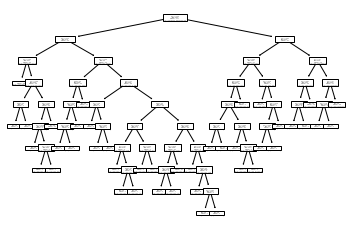

In [64]:
# visualize your tree
tree.plot_tree(model)

In [65]:
# check the hyperparameters used
model.get_params(deep=True)

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [66]:
# check your tree's depth
model.get_depth()

9

**Awesome progress if you've come this far! **

Extra credit - Why don't we play with the hyperparameters we discussed earlier to see how our model changes?

check the documentation and choose the hyperparameters you like: 
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [ ]:
# initialize your classifier again but this time with the hyperparamers you want


In [ ]:
## fit your classifier to the data using the .fit() method
# predict train set values
# predict test set values

In [ ]:
# check accuracy on training set
# check accuracy on testing set

In [ ]:
# visualize your tree
 tree.plot_tree(model)

# Reflect on your results